In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB,ComplementNB,GaussianNB
from sklearn.metrics import confusion_matrix

In [3]:
train=pd.read_csv("SalaryData_Train.csv")

In [23]:
test=pd.read_csv("SalaryData_Test.csv")

In [4]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
train.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
30160,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
train.shape

(30161, 14)

In [7]:
train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [8]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [24]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [25]:
test.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K
15059,35,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K


In [27]:
test.shape

(15060, 14)

In [28]:
test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [29]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [31]:
test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [32]:
train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [33]:
test.value_counts()

age  workclass          education      educationno  maritalstatus        occupation          relationship    race    sex      capitalgain  capitalloss  hoursperweek  native          Salary
40    Private            HS-grad       9             Married-civ-spouse   Craft-repair        Husband         White   Male    0            0            40             United-States   <=50K    9
31    Private            HS-grad       9             Married-civ-spouse   Craft-repair        Husband         White   Male    0            0            40             United-States   <=50K    8
33    Private            HS-grad       9             Married-civ-spouse   Machine-op-inspct   Husband         White   Male    0            0            40             United-States   <=50K    8
32    Private            HS-grad       9             Married-civ-spouse   Craft-repair        Husband         White   Male    0            0            40             United-States   <=50K    8
36    Private            HS-grad   

In [34]:
train.value_counts()

age  workclass          education      educationno  maritalstatus        occupation        relationship     race                 sex      capitalgain  capitalloss  hoursperweek  native          Salary
33    Private            HS-grad       9             Married-civ-spouse   Craft-repair      Husband          White                Male    0            0            40             United-States   <=50K    16
35    Private            HS-grad       9             Married-civ-spouse   Craft-repair      Husband          White                Male    0            0            40             United-States   <=50K    15
39    Private            HS-grad       9             Married-civ-spouse   Craft-repair      Husband          White                Male    0            0            40             United-States   <=50K    14
51    Private            HS-grad       9             Married-civ-spouse   Craft-repair      Husband          White                Male    0            0            40            

workclass


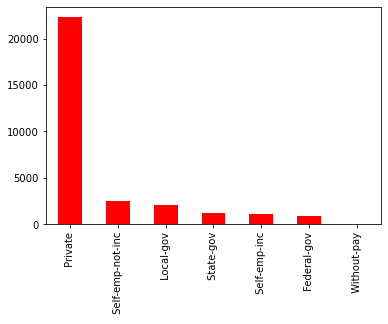

education


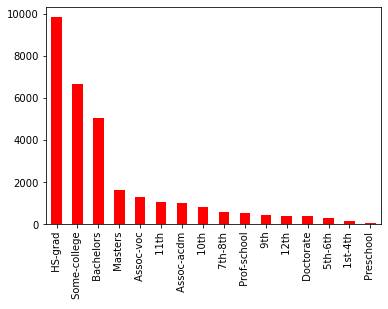

maritalstatus


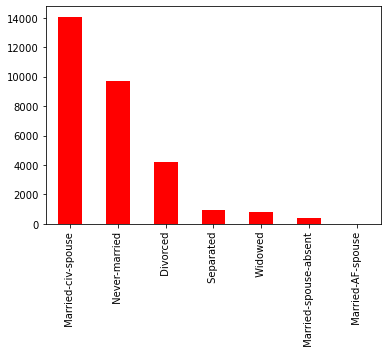

occupation


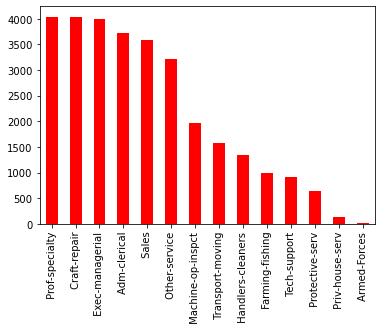

relationship


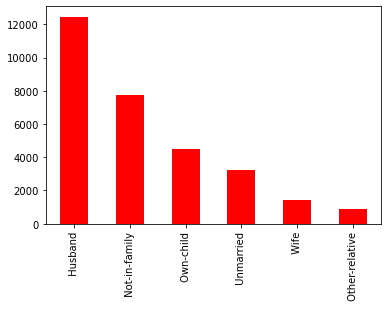

race


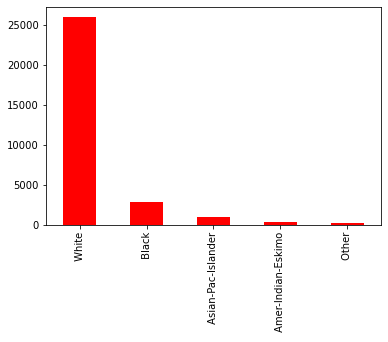

sex


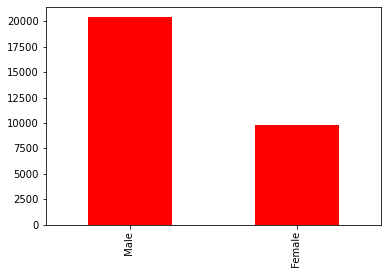

native


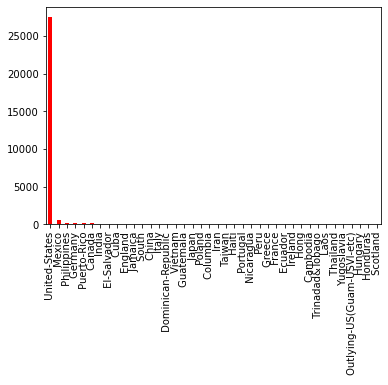

Salary


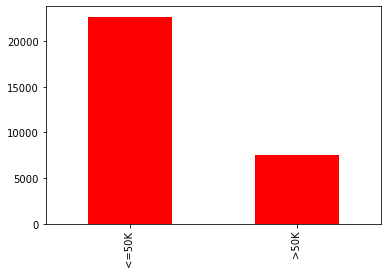

In [18]:
for i in train:
    if train[i].dtype=='object':
        print(i)
        train[i].value_counts().plot.bar(color='red')
        plt.show()
    else:
            pass
        
    

In [22]:
for i in train:
    if train[i].dtype!='object':
        print(i)
    else:
        pass

age
educationno
capitalgain
capitalloss
hoursperweek


In [36]:
train1=pd.get_dummies(train.iloc[:,:13])
train1.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
train_final=pd.concat([train1,train['Salary']],axis=1)
train_final.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,<=50K
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,<=50K


In [41]:
x_train = train_final.values[:,0:102]
y_train = train_final.values[:,102]

In [42]:
x_train

array([[39, 13, 2174, ..., 1, 0, 0],
       [50, 13, 0, ..., 1, 0, 0],
       [38, 9, 0, ..., 1, 0, 0],
       ...,
       [58, 9, 0, ..., 1, 0, 0],
       [22, 9, 0, ..., 1, 0, 0],
       [52, 9, 15024, ..., 1, 0, 0]], dtype=object)

In [43]:
y_train

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [44]:
test1=pd.get_dummies(test.iloc[:,:13])
test1.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
test_final=pd.concat([train1,train['Salary']],axis=1)
test_final.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,<=50K
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,<=50K


In [48]:
x_test=test_final.values[:,0:102]
y_test=test_final.values[:,102]

In [49]:
x_test

array([[39, 13, 2174, ..., 1, 0, 0],
       [50, 13, 0, ..., 1, 0, 0],
       [38, 9, 0, ..., 1, 0, 0],
       ...,
       [58, 9, 0, ..., 1, 0, 0],
       [22, 9, 0, ..., 1, 0, 0],
       [52, 9, 15024, ..., 1, 0, 0]], dtype=object)

In [50]:
y_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

## Naive Bayes Algorithm
### 1.Mutlinomial naive bayes

In [54]:
c_mb=MultinomialNB()
c_mb.fit(x_train,y_train)

MultinomialNB()

In [55]:
c_mb=MultinomialNB()
c_mb.fit(x_test,y_test)

MultinomialNB()

In [57]:
train_pred_m=c_mb.predict(x_train)
accuracy_train_m=np.mean(train_pred_m==y_train)
accuracy_train_m

0.7729186698053778

In [58]:
test_pred_m=c_mb.predict(x_test)
accuracy_test_m=np.mean(test_pred_m==y_test)
accuracy_test_m

0.7729186698053778

In [62]:
print("Training Accuracy is",accuracy_train_m,"\n""Testing Accuracy is",accuracy_test_m)

Training Accuracy is 0.7729186698053778 
Testing Accuracy is 0.7729186698053778


In [64]:
print(confusion_matrix(train_pred_m,y_train))

[[21717  5913]
 [  936  1595]]


In [65]:
print(confusion_matrix(test_pred_m,y_test))

[[21717  5913]
 [  936  1595]]


## 2. Complement Naive Bayes()

In [77]:
c_cb=ComplementNB()
c_cb.fit(x_train,y_train)

ComplementNB()

In [78]:
c_cb=ComplementNB()
c_cb.fit(x_test,y_test)

ComplementNB()

In [79]:
train_pred_cb=c_gb.predict(x_train)
accuracy_train_cb=np.mean(train_pred_cb==y_train)
accuracy_train_cb

0.7729186698053778

In [81]:
test_pred_cb=c_cb.predict(x_test)
accuracy_test_cb=np.mean(test_pred_cb==y_test)
accuracy_test_cb

0.7729186698053778

In [82]:
print("Training accuracy is",accuracy_train_cb,"\n""Testing accuracy is",accuracy_test_cb)

Training accuracy is 0.7729186698053778 
Testing accuracy is 0.7729186698053778


In [83]:
print(confusion_matrix(train_pred_cb,y_train))

[[21717  5913]
 [  936  1595]]


In [84]:
print(confusion_matrix(test_pred_cb,y_test))

[[21717  5913]
 [  936  1595]]


## 3.Gaussian Naive Bayes 

In [85]:
c_gb=GaussianNB()
c_gb.fit(x_test,y_test)

GaussianNB()

In [86]:
c_gb=GaussianNB()
c_gb.fit(x_train,y_train)

GaussianNB()

In [87]:
train_pred_g=c_gb.predict(x_train)
accuracy_train_g=np.mean(train_pred_g==y_test)
accuracy_train_g

0.8031563940187659

In [88]:
test_pred_g=c_gb.predict(x_test)
accuracy_test_g=np.mean(test_pred_g==y_test)
accuracy_test_g

0.8031563940187659

In [90]:
print("Training accuracy is",accuracy_train_g,"\n""Testing accuracy is",accuracy_test_g)

Training accuracy is 0.8031563940187659 
Testing accuracy is 0.8031563940187659


In [92]:
print(confusion_matrix(train_pred_g,y_train))

[[18151  1435]
 [ 4502  6073]]


In [93]:
print(confusion_matrix(test_pred_g,y_test))

[[18151  1435]
 [ 4502  6073]]


Conclusion:
After analyzing the above models Gaussian model gives the 80% accuracy data so we can use it for salaries with the given features